In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Scikit-learn

- Use `train_test_split` to split dataset (`stratify` attrbute for inbalanced classes)
- Scale numberical variables with built-in transformers such as `StandardScaler` and `RobustScaler`.
    - [What algorithms need feature scaling?](https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm)
- Encode multiple categorical variables at once with `ColumnTransformer`
- Use pipelines to write efficient code and reduce the risk of data leakage


Model accuracy: 0.92
              precision    recall  f1-score   support

      Adelie       1.00      0.84      0.91        43
   Chinstrap       0.77      1.00      0.87        24
      Gentoo       0.97      0.97      0.97        33

    accuracy                           0.92       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.94      0.92      0.92       100



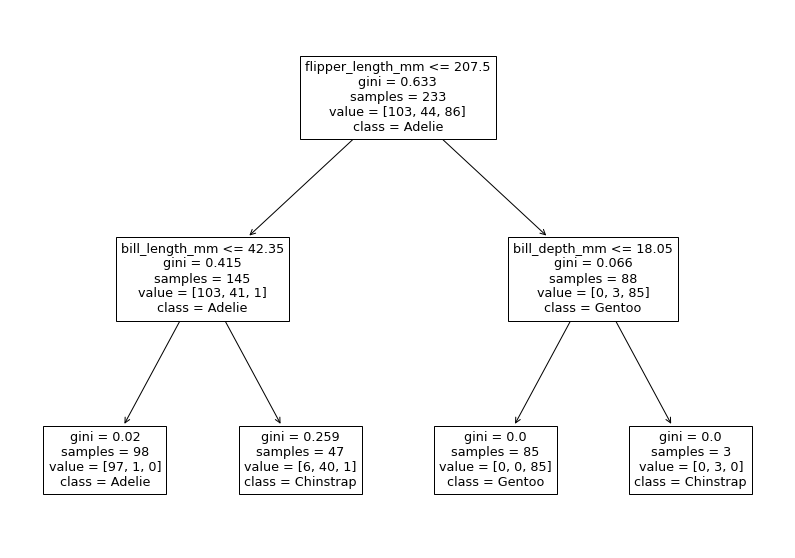

In [10]:
# Simple decision tree example without using pipelines

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

# Load data
penguins = (
    pd.read_csv("../data/penguins_dataset.csv")
    .dropna()
)
feature_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

X = penguins[feature_columns]
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Define & train model
model = DecisionTreeClassifier(max_depth=2, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate results
report = classification_report(y_test, y_pred)
print(f"Model accuracy: {model.score(X_test, y_test)}")
print(report)

fig, ax = plt.subplots(figsize=(14,10))

plot_tree(model, 
          ax=ax, 
          feature_names = feature_columns, 
          class_names = y.unique());

In [16]:
# Gradient boosting regressor example with scikit-learn pipelines

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
cars = (
    pd.read_csv("../data/cars_dataset.csv")
    .rename(str.lower, axis="columns")
    .loc[lambda df: df["cylinders"] > 3]
    .dropna()
    .assign(year=lambda df: df["year"].str.slice(0,4).astype('int'))
)

feature_columns = ["miles_per_gallon", "cylinders", "displacement", "horsepower", "acceleration", "year", "origin"]

X = cars[feature_columns]
y = cars["weight_in_lbs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Define model
categorical_columns = ["origin"]

ct = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(drop="first", handle_unknown="error"), categorical_columns)
    ], remainder="passthrough") 

model = Pipeline(steps=[
      ("encoding", ct),
      ("scaler", StandardScaler()),
      ("estimator", GradientBoostingRegressor())
])

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred  = model.predict(X_test)

# Evaluate results
r2 = r2_score(y_test, y_pred).round(3)
mae = mean_absolute_error(y_test, y_pred).round(3)

print(f"R2: {r2}")
print(f"MAE: {mae}")

R2: 0.934
MAE: 144.944
